# Géométrie à vue unique

Dans ce notebook, nous estimerons les paramètres de l'appareil photo à partir d'une seule vue et nous la nature projective des caméras pour trouver à la fois le centre de la caméra et la longueur présents dans la scène ci-dessus.

<img src="https://drive.google.com/uc?export=view&id=1YturM_xkpS17AbH9A1tsaNHh-OHTw1Fi">


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2
from utils import mat2euler

In [2]:
P1=np.array([[4,878],[126,1056],[504,900],[372,812],[424,356],[1080,598],[1840,478],[1940,866],[674,1826],[1094,1340],[1774, 1086],[2456,1060]])

In [3]:
P2=np.array([[36,1578],[314,1912],[750,1378],[714,614],[1438,1094],[1474,494],[1598,882],[2060,1040]])

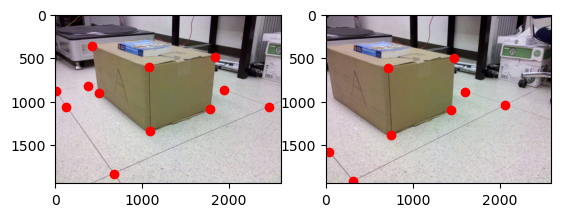

In [4]:

image1=cv2.imread('1.jpg')
image2=cv2.imread('2.jpg')


plt.subplot(121)
plt.imshow(np.flip(image1,-1))
plt.scatter(P1[:,0],P1[:,1],c='r')
plt.subplot(122)
plt.imshow(np.flip(image2,-1))
plt.scatter(P2[:,0],P2[:,1],c='r')

## Point de fuite
* Nous avons identifié un ensemble de pixels pour calculer les points de fuite dans chaque image, nous allons maintenant calculer le point de fuite à partir de deux paires de points sur des lignes parallèles. Nous supposerons que la caméra n’a aucune inclinaison et aucun pixel carré, sans distorsion.

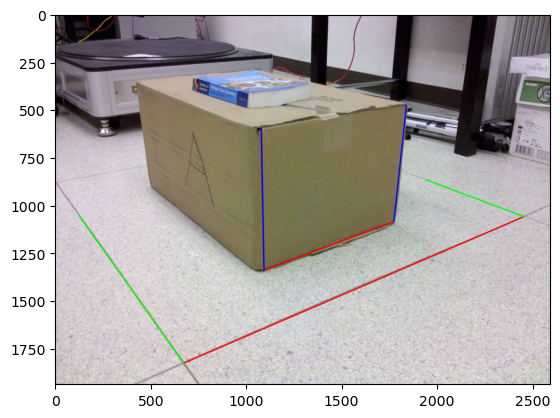

In [5]:
img=image1.copy()
img = cv2.line(img,  [2456, 1060],[674, 1826], (0,0,255), 5)
img = cv2.line(img, [1774, 1086],[1094, 1340], (0,0,255), 5)



img = cv2.line(img,  [126, 1056],[674, 1826], (0,255,0), 5)
img = cv2.line(img, [1940, 866],[2456, 1060], (0,255,0), 5)


img = cv2.line(img,  [1080, 598],[1094, 1340], (255,0,0), 5)
img = cv2.line(img, [1840, 478],[1774, 1086], (255,0,0), 5)


plt.imshow(np.flip(img,-1))

In [6]:
def compute_vanishing_point(points):
    """Calcule le point de fuite à partir de quatre points sur une ligne parallèle.

    Args :
        points : Une liste de tous les points où chaque ligne est (x, y). En général,
            elle contiendra quatre points : deux pour chaque ligne parallèle.
            Vous pouvez utiliser la convention de votre choix, mais notre solution utilise les deux premières lignes comme points sur la même ligne et la dernière ligne comme points sur la même ligne.
            les deux premières lignes comme des points sur la même ligne et les deux dernières comme des points sur la même ligne.
            les deux dernières lignes comme des points sur la même ligne.
    Retourne :
        vanishing_point : L'emplacement en pixels du point de fuite.
    """
    # construire (x1, y1) (x2, y2) (x3, y3) (x4, y4)
    x1 = points[0][0]; y1 = points[0][1];
    x2 = points[1][0]; y2 = points[1][1];
    x3 = points[2][0]; y3 = points[2][1];
    x4 = points[3][0]; y4 = points[3][1];

    # pentes
    m1 = (float)(y2 - y1) / (x2 - x1)
    m2 = (float)(y4 - y3) / (x4 - x3)
    # intercepts
    b1 = y2 - m1 * x2
    b2 = y4 - m2 * x4

    # Coordonnées du point de fuite
    x = (b2 - b1) / (m1 - m2)
    y = m1 * ((b2 - b1)/(m1 - m2)) + b1
    vanishing_point = np.array([x, y])
    return vanishing_point


# Partie A : Calculer les points de fuite.
v1 = compute_vanishing_point(np.array(
            [[674, 1826], [2456, 1060], [1094, 1340], [1774, 1086]]))
v2 = compute_vanishing_point(np.array(
            [[674, 1826], [126, 1056], [2456, 1060], [1940, 866]]))
v3 = compute_vanishing_point(np.array(
            [[1094, 1340], [1080, 598], [1774, 1086], [1840, 478]]))
v4 = compute_vanishing_point(np.array(
            [[424,356], [1089,598], [504,900], [1094,1340]]))

box_vanishing2 = compute_vanishing_point(np.array(
            [[1094, 1340], [1774, 1086], [1080, 598], [1840, 478]]))

v1b = compute_vanishing_point(np.array(
            [[314, 1912], [2060, 1040], [750, 1378], [1438, 1094]]))
v2b = compute_vanishing_point(np.array(
            [[314, 1912], [36, 1578], [2060, 1040], [1598, 882]]))
v3b = compute_vanishing_point(np.array(
            [[750, 1378], [714, 614], [1438, 1094], [1474, 494]]))

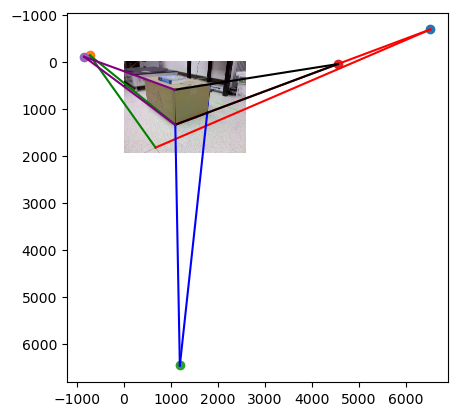

In [7]:
plt.imshow(np.flip(img,-1))

plt.scatter(v1[0],v1[1],label='v1')
plt.plot([674, v1[0] ],[1826, v1[1]],c='r')
plt.plot([1094, v1[0] ],[1340, v1[1]],c='r')

plt.scatter(v2[0],v2[1])
plt.plot([674, v2[0] ],[1826, v2[1]],c='g')
plt.plot([1094, v2[0] ],[1340, v2[1]],c='g')




plt.scatter(v3[0],v3[1])
plt.plot([1094, v3[0] ],[1340, v3[1]],c='b')
plt.plot([1774, v3[0] ],[1086, v3[1]],c='b')



plt.scatter(box_vanishing2[0],box_vanishing2[1])
plt.plot([1094, box_vanishing2[0] ],[1340, box_vanishing2[1]],c='black')
plt.plot([1080, box_vanishing2[0] ],[598, box_vanishing2[1]],c='black')

plt.scatter(v4[0],v4[1])
plt.plot([1089, v4[0] ],[598, v4[1]],c='purple')
plt.plot([1094, v4[0] ],[1340, v4[1]],c='purple')


* En utilisant trois points de fuite, nous pouvons calculer la matrice intrinsèque de la caméra utilisée pour prendre l’image.

* Nous savons d'après le cours que
$$\begin{matrix}
v_1 w v_2=0\\
v_1 w v_3=0\\
v_2 w v_3=0
\end{matrix}  \qquad w=(KK^T)^{-1}$$
*Si nous supposons que la caméra a une inclinaison nulle et des pixels carrés, nous pouvons ajouter les deux contraintes supplémentaires nécessaires. Grâce à ces hypothèses, nous savons alors que ω prend la forme de

$$w=\begin{bmatrix}
w_1 &0  &w_4 \\
0 &w_1  &w_5 \\
 w_4& w_5 & w_6
\end{bmatrix}$$

* Nous ne pouvons connaître ω que jusqu'à l'échelle, ce qui réduit le nombre de variables réelles à trois, permettant ainsi de résoudre le problème.

* Une fois que nous avons ω, nous pouvons utiliser la décomposition de Cholesky pour calculer K
* chaque equation peut etre re-ecrite

$$\begin{matrix}
v'^Twv=x'(w_0x+w_1)+y'(w_0y+w_2)+(w_1x+w_2y+w_3)\\
=w_0(xx'+yy')+w_1(x+x')+w_2(y+y')+w_3\\
=\begin{bmatrix}
xx' +yy'& x+x' &y+y'& 1
\end{bmatrix}\begin{bmatrix}
w_0\\
w_1\\
w_2\\
w_3
\end{bmatrix}
\end{matrix}$$

In [8]:
def compute_K_from_vanishing_points(vanishing_points):
    """Calcule la matrice intrinsèque à partir des points de fuite.

    Args :
        vanishing_points : Une liste de points de fuite.
    Retourne :
        K : La matrice intrinsèque de la caméra (matrice 3x3).
    """
    # points de fuite utilisés
    v1 = vanishing_points[0]
    v2 = vanishing_points[1]
    v3 = vanishing_points[2]

    # construire la matrice de contrainte A à partir de chaque paire de points de fuite
    A = np.zeros((3, 3))
    # 1 + 2
    vi = v1
    vj = v2
    A[0] = np.array([(vi[0]*vj[0]+vi[1]*vj[1]), (vi[0]+vj[0]), (vi[1]+vj[1])])

    # 1 + 3
    vi = v1
    vj = v3
    A[1] = np.array([(vi[0]*vj[0]+vi[1]*vj[1]), (vi[0]+vj[0]), (vi[1]+vj[1])])

    # 2 + 3
    vi = v2
    vj = v3
    A[2] = np.array([(vi[0]*vj[0]+vi[1]*vj[1]), (vi[0]+vj[0]), (vi[1]+vj[1])])

    # ajouter une colonne de uns
    A_ones = np.ones((A.shape[0], 1))
    A = np.hstack((A, A_ones))

    # SVD
    U, s, VT = np.linalg.svd(A)
    w = VT[-1, :]
    omega = np.array([[w[0], 0, w[1]],
                      [0, w[0], w[2]],
                      [w[1], w[2], w[3]]])

    # trouver la matrice K à partir de l'oméga
    KT_inv = np.linalg.cholesky(omega)
    K = np.linalg.inv(KT_inv.T)
    # normaliser
    K /= K[2, 2]
    return K

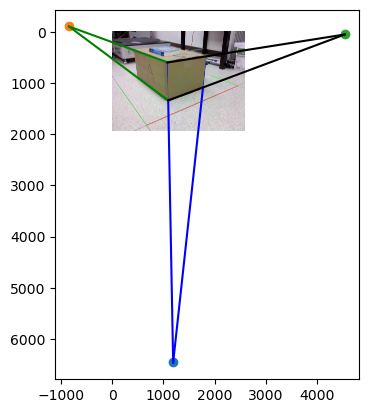

In [9]:
plt.imshow(np.flip(img,-1))

plt.scatter(v3[0],v3[1])
plt.plot([1094, v3[0] ],[1340, v3[1]],c='b')
plt.plot([1774, v3[0] ],[1086, v3[1]],c='b')

plt.scatter(v4[0],v4[1])
plt.plot([1089, v4[0] ],[598, v4[1]],c='g')
plt.plot([1094, v4[0] ],[1340, v4[1]],c='g')




plt.scatter(box_vanishing2[0],box_vanishing2[1])
plt.plot([1094, box_vanishing2[0] ],[1340, box_vanishing2[1]],c='black')
plt.plot([1080, box_vanishing2[0] ],[598, box_vanishing2[1]],c='black')

In [10]:
vanishing_points = [v4, v3, box_vanishing2]
K_ours = compute_K_from_vanishing_points(vanishing_points)
print("Matrice intrinsèque:\n", K_ours)

Matrice intrinsèque:
 [[2.42331136e+03 0.00000000e+00 1.34787856e+03]
 [0.00000000e+00 2.42331136e+03 1.04184015e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [11]:
K_actual = np.array([[2448.0, 0, 1253.0], [0, 2438.0, 986.0], [0, 0, 1.0]])
print()
print("Matrice réelle:\n", K_actual)


Matrice réelle:
 [[2.448e+03 0.000e+00 1.253e+03]
 [0.000e+00 2.438e+03 9.860e+02]
 [0.000e+00 0.000e+00 1.000e+00]]


In [12]:
print(K_actual-K_ours)

[[ 24.68864039   0.         -94.87856256]
 [  0.          14.68864039 -55.84015065]
 [  0.           0.           0.        ]]
